# Introduction

This notebook demonstrates the use of the Materials API using Python. We will do so with Python Materials Genomics (pymatgen)'s high level tools as well as using the requests package.

# Using pymatgen's MPRester (Recommended)

In [1]:
# We start by importing MPRester, which is available from the root import of pymatgen.
from pymatgen import MPRester
from pprint import pprint

# Initializing MPRester. Note that you can call MPRester. MPRester looks for the API key in two places: 
# - Supplying it directly as an __init__ arg.
# - Setting the "MAPI_KEY" environment variable.
# Please obtain your API key at https://www.materialsproject.org/dashboard

m = MPRester()

## Doing simple queries using the high-level methods.

Many methods in MPRester supports the extremely simple yet powerful query syntax for materials. There are three kinds of queries:

1. Formulae, e.g., "Li2O", "Fe2O3", "*TiO3
2. Chemical systems, e.g., "Li-Fe-O", "*-Fe-O"
3. Materials ids, e.g., "mp-1234"

The MPRester automatically detects what kind of query is being made. Also, for formulas and chemical systems, wildcards are supported with a \*. That means *2O will yield a list of the following formula results:

B2O, Xe2O, Li2O ...

In [2]:
#The following query returns all structures in the Materials Project with formula "Fe2O3"
pprint(m.get_data("Li2O", prop="structure"))

[{u'material_id': u'mp-1960',
  u'structure': Structure Summary
Lattice
    abc : 3.2910717923597561 3.2910718996250861 3.2910720568557887
 angles : 60.129710432884849 60.129709521376753 60.129703130390972
 volume : 25.279668381289056
      A : 2.91738857 0.097894369999999994 1.5200046599999999
      B : 0.96463405999999996 2.7550356100000002 1.5200046599999999
      C : 0.13320635 0.097894430000000004 3.28691771
PeriodicSite: O (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Li (3.0121, 2.2136, 4.7463) [0.7502, 0.7502, 0.7502]
PeriodicSite: Li (1.0031, 0.7372, 1.5806) [0.2498, 0.2498, 0.2498]},
 {u'material_id': u'mp-755894',
  u'structure': Structure Summary
Lattice
    abc : 5.1517948200000001 3.1404278300000001 5.9334081599999999
 angles : 90.0 90.0 90.0
 volume : 95.995660249910003
      A : 5.1517948200000001 0.0 0.0
      B : 0.0 3.1404278300000001 0.0
      C : 0.0 0.0 5.9334081599999999
PeriodicSite: Li (0.0631, 0.7851, 0.9438) [0.0122, 0.2500, 0.1591]
Periodic

In [3]:
# These query returns the chemical formula and material id of all Materials with formula of form "*3O4". 
# The material_id is always returned with any use of get_data.
pprint(m.get_data("*3O4", prop="pretty_formula"))

[{u'material_id': u'mp-1605', u'pretty_formula': u'Ag3O4'},
 {u'material_id': u'mp-18748', u'pretty_formula': u'Co3O4'},
 {u'material_id': u'mp-772696', u'pretty_formula': u'Cr3O4'},
 {u'material_id': u'mp-19306', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-650112', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-542433', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-18731', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-705416', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-541907', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-612405', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-715275', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-715614', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-31770', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-714989', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-715438', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-716052', u'pretty_formula': u'Fe3O4'},
 {u'material_i

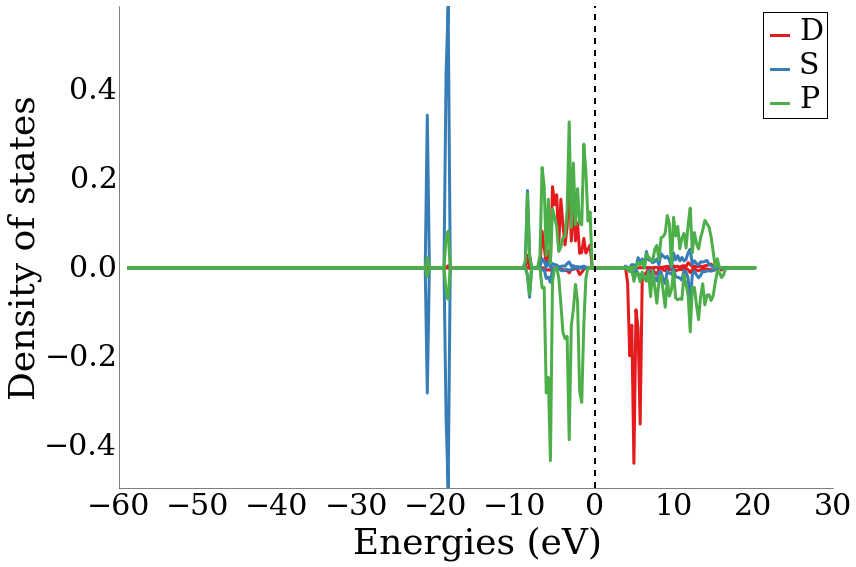

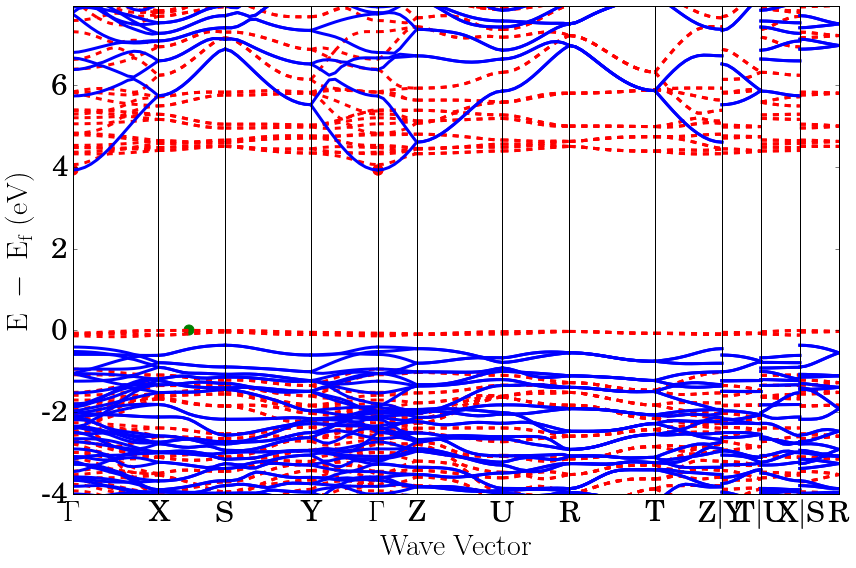

In [4]:
# Getting a DOS object and plotting it. Bandstructures are similar.

dos = m.get_dos_by_material_id("mp-19017")
bs = m.get_bandstructure_by_material_id("mp-19017")

from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter
%matplotlib inline

dos_plotter = DosPlotter()
dos_plotter.add_dos_dict(dos.get_spd_dos())
dos_plotter.show()

bs_plotter = BSPlotter(bs)
bs_plotter.show()

## More sophisticated queries using MPRester's very powerful query method.

The query() method essentially works almost like a raw MongoDB query on the Materials Project database. With it, you can perform extremely sophisticated queries to obtain large and customized quantities of materials data easily. The way to use query is

```python
query(criteria, properties)
```

The criteria argument can either be a simple string similar to the powerful wildcard based formula and chemical system search described above, or a full MongoDB query dict with all the features of the Mongo query syntax.

In [5]:
# Get material ids for everything in the Materials Project database

data = m.query(criteria={}, properties=["task_id"])

In [6]:
# Get the energy for materials with material_ids "mp-1234" and "mp-2345".
data = m.query(criteria={"task_id": {"$in": ["mp-1234", "mp-1"]}}, properties=["final_energy"])
print data

[{u'final_energy': -0.85561492}, {u'final_energy': -26.94736193}]


In [7]:
# Get the spacegroup symbol for all materials with formula Li2O.
data = m.query(criteria={"pretty_formula": "Li2O"}, properties=["spacegroup.symbol"])
print data

[{u'spacegroup.symbol': u'Fm-3m'}, {u'spacegroup.symbol': u'Pnma'}]


In [8]:
# Get the ICSD of all compounds containing either K, Li or Na with O.
data = m.query(criteria={"elements": {"$in": ["K", "Li", "Na"], "$all": ["O"]}, "nelements": 2}, 
               properties=["icsd_id", "pretty_formula", "spacegroup.symbol"])
pprint(data)

[{u'icsd_id': 108886,
  u'pretty_formula': u'Li2O',
  u'spacegroup.symbol': u'Fm-3m'},
 {u'icsd_id': 152183,
  u'pretty_formula': u'Li2O2',
  u'spacegroup.symbol': u'P6_3/mmc'},
 {u'icsd_id': None,
  u'pretty_formula': u'KO2',
  u'spacegroup.symbol': u'I4/mmm'},
 {u'icsd_id': 202496,
  u'pretty_formula': u'KO3',
  u'spacegroup.symbol': u'I4/mcm'},
 {u'icsd_id': None, u'pretty_formula': u'K2O', u'spacegroup.symbol': u'Fm-3m'},
 {u'icsd_id': None,
  u'pretty_formula': u'Na2O',
  u'spacegroup.symbol': u'Fm-3m'},
 {u'icsd_id': 411168,
  u'pretty_formula': u'NaO3',
  u'spacegroup.symbol': u'Im2m'},
 {u'icsd_id': None,
  u'pretty_formula': u'Li2O2',
  u'spacegroup.symbol': u'P6_3/mmc'},
 {u'icsd_id': 38246, u'pretty_formula': u'KO2', u'spacegroup.symbol': u'C2/c'},
 {u'icsd_id': None, u'pretty_formula': u'K2O', u'spacegroup.symbol': u'C2/c'},
 {u'icsd_id': None, u'pretty_formula': u'NaO2', u'spacegroup.symbol': u'Pa3'},
 {u'icsd_id': [], u'pretty_formula': u'Na2O', u'spacegroup.symbol': u'Pn

# Using requests (or urllib)

If you decide not to install pymatgen, you can still make use of the Materials API by calling the relevant URLs directly. Here, we will demonstrate how you can do so using the *requests* library, though any http library should work similarly. All the queries demonstrated here are similar to the above queries.

In [9]:
import requests
import os
import json

In [10]:
r = requests.get("https://www.materialsproject.org/rest/v2/materials/Li2O/vasp/final_structure",
                 headers={"X-API-KEY": os.environ["MAPI_KEY"]})
content = r.json() # a dict

In [11]:
r = requests.get("https://www.materialsproject.org/rest/v2/materials/*3O4/vasp/pretty_formula",
                 headers={"X-API-KEY": os.environ["MAPI_KEY"]})
content = r.json() # a dict
pprint(content["response"])

[{u'material_id': u'mp-1605', u'pretty_formula': u'Ag3O4'},
 {u'material_id': u'mp-18748', u'pretty_formula': u'Co3O4'},
 {u'material_id': u'mp-772696', u'pretty_formula': u'Cr3O4'},
 {u'material_id': u'mp-19306', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-650112', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-542433', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-18731', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-705416', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-541907', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-612405', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-715275', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-715614', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-31770', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-714989', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-715438', u'pretty_formula': u'Fe3O4'},
 {u'material_id': u'mp-716052', u'pretty_formula': u'Fe3O4'},
 {u'material_i

Note that we cannot demonstrate DOS nad Bandstructure plotting here, since those rely on pymatgen's high level plotting utilities for these objects. But you can of course query for the DOS and Bandstructure data and implement your own customized plotting in your favorite graphing utility.

In [12]:
data = {
    "criteria": {
        "elements": {"$in": ["Li", "Na", "K"], "$all": ["O"]},
        "nelements": 2,
    },
    "properties": [
        "icsd_id",
        "pretty_formula",
        "spacegroup.symbol"
    ]
}
r = requests.post('https://materialsproject.org/rest/v2/query',
                 headers={'X-API-KEY': os.environ["MAPI_KEY"]},
                 data={k: json.dumps(v) for k,v in data.iteritems()})
content = r.json() # a dict
pprint(content["response"])

[{u'icsd_id': 108886,
  u'pretty_formula': u'Li2O',
  u'spacegroup.symbol': u'Fm-3m'},
 {u'icsd_id': 152183,
  u'pretty_formula': u'Li2O2',
  u'spacegroup.symbol': u'P6_3/mmc'},
 {u'icsd_id': None,
  u'pretty_formula': u'KO2',
  u'spacegroup.symbol': u'I4/mmm'},
 {u'icsd_id': 202496,
  u'pretty_formula': u'KO3',
  u'spacegroup.symbol': u'I4/mcm'},
 {u'icsd_id': None, u'pretty_formula': u'K2O', u'spacegroup.symbol': u'Fm-3m'},
 {u'icsd_id': None,
  u'pretty_formula': u'Na2O',
  u'spacegroup.symbol': u'Fm-3m'},
 {u'icsd_id': 411168,
  u'pretty_formula': u'NaO3',
  u'spacegroup.symbol': u'Im2m'},
 {u'icsd_id': None,
  u'pretty_formula': u'Li2O2',
  u'spacegroup.symbol': u'P6_3/mmc'},
 {u'icsd_id': 38246, u'pretty_formula': u'KO2', u'spacegroup.symbol': u'C2/c'},
 {u'icsd_id': None, u'pretty_formula': u'K2O', u'spacegroup.symbol': u'C2/c'},
 {u'icsd_id': None, u'pretty_formula': u'NaO2', u'spacegroup.symbol': u'Pa3'},
 {u'icsd_id': [], u'pretty_formula': u'Na2O', u'spacegroup.symbol': u'Pn